<a href="https://colab.research.google.com/github/Bang-seok/base_station_data_classification/blob/main/Decisiontree_SKT%2BKT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*KT Traffic 데이터 세트 전처리*

In [ ]:
import pandas as pd
import os
import numpy as np
import random

#총 136개 : 주거 1~49, 상업 50~113, 학교 114~126, 나머지 127~136   아파트 섞여있음
#read_csv 관련 글 https://yganalyst.github.io/data_handling/Pd_4/

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
kt_raw_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/KT/KT데이터정리_코엑스.csv')

In [ ]:
#필요없는 "일자", "시간" series 삭제
kt_df = kt_raw_df.drop(["일자","시간"], axis=1)

In [ ]:
kt_df

#총 38개의 기지국으로 이루어져있다.
#2022.09.17(토) 00시~ 2022.10.16(일) 23시 까지의 모바일 트래픽
#09.30의 20시, 22시, 23시, 10.01의 01시, 04시가 결측치라 0으로 채워넣음. 

,1번 국소/1번 기지국,1번 국소/2번 기지국,2번 국소/1번 기지국,2번 국소/2번 기지국,3번 국소/1번 기지국,3번 국소/2번 기지국,3번 국소/3번 기지국,3번 국소/4번 기지국,3번 국소/5번 기지국,4번 국소/1번 기지국,...,7번 국소/14번 기지국,8번 국소/1번 기지국,8번 국소/2번 기지국,9번 국소/1번 기지국,10번 국소/1번 기지국,10번 국소/2번 기지국,11번 국소/1번 기지국,11번 국소/2번 기지국,11번 국소/3번 기지국,11번 국소/4번 기지국
0,12438,898,84888,42070,766,1581,31,410,8677,786589,...,3094,31190,6274,102575,211313,16623,131,13920,2331,298
1,12392,78,59797,30570,1552,2376,4,800,26876,462183,...,3921,29580,4137,28492,185485,23185,23,17659,12380,3
2,12254,591,30639,30163,559,847,16,1184,9553,465034,...,96,12275,13334,15287,191828,5090,8,6917,1979,9
3,12271,389,28420,31804,434,743,24,1339,8520,530372,...,654,5997,2900,124235,189262,2395,94,13124,13146,6
4,12345,141,33208,38137,311,654,11,461,8537,243742,...,206,10123,7885,24525,187209,1032,3,15546,512,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,20254,255,1265535,2680346,41325,7273,7484,6418,8156,1964042,...,197155,182522,410015,99864,216953,137185,80994,5508,6840,4535
716,16956,757,825732,1562924,16034,9371,0,0,3602,1756822,...,114466,265469,50976,68969,94803,87840,4596,22418,1874,708
717,23104,46,133255,180413,4258,1474,0,0,3330,1406604,...,36137,116999,8863,153681,53887,20965,275,22861,1143,1325
718,26796,93,136016,119153,6534,841,0,0,1989,958568,...,5553,65273,8449,132101,21721,6986,309,21761,1093,2005


In [ ]:
#kt_df의 column을 0~37로 바꿈.
kt_df.columns = range(len(kt_df.columns))
kt_df

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,12438,898,84888,42070,766,1581,31,410,8677,786589,...,3094,31190,6274,102575,211313,16623,131,13920,2331,298
1,12392,78,59797,30570,1552,2376,4,800,26876,462183,...,3921,29580,4137,28492,185485,23185,23,17659,12380,3
2,12254,591,30639,30163,559,847,16,1184,9553,465034,...,96,12275,13334,15287,191828,5090,8,6917,1979,9
3,12271,389,28420,31804,434,743,24,1339,8520,530372,...,654,5997,2900,124235,189262,2395,94,13124,13146,6
4,12345,141,33208,38137,311,654,11,461,8537,243742,...,206,10123,7885,24525,187209,1032,3,15546,512,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,20254,255,1265535,2680346,41325,7273,7484,6418,8156,1964042,...,197155,182522,410015,99864,216953,137185,80994,5508,6840,4535
716,16956,757,825732,1562924,16034,9371,0,0,3602,1756822,...,114466,265469,50976,68969,94803,87840,4596,22418,1874,708
717,23104,46,133255,180413,4258,1474,0,0,3330,1406604,...,36137,116999,8863,153681,53887,20965,275,22861,1143,1325
718,26796,93,136016,119153,6534,841,0,0,1989,958568,...,5553,65273,8449,132101,21721,6986,309,21761,1093,2005


In [ ]:
#결측치 보완되어서 왔기 때문에 해당 코드 삭제
#0값으로된 부분을 앞에 값으로 채움.
# for i in range(len(kt_df.columns)):
#     kt_df[i] = kt_df[i].mask(kt_df[i] == 0).ffill(downcast='infer')
# kt_df

In [ ]:
for i in range(len(kt_df.columns)):
    count = 0
    for j in range(1, len(kt_df)):
        if (kt_df[i][j-1] == kt_df[i][j]):
            count = count + 1
    if (count > (len(kt_df) / 10)):
        kt_df = kt_df.drop([i], axis=1)
kt_df

,0,1,2,3,4,5,8,9,10,11,...,28,29,30,31,32,33,34,35,36,37
0,12438,898,84888,42070,766,1581,8677,786589,3306,9582,...,3094,31190,6274,102575,211313,16623,131,13920,2331,298
1,12392,78,59797,30570,1552,2376,26876,462183,11858,2880,...,3921,29580,4137,28492,185485,23185,23,17659,12380,3
2,12254,591,30639,30163,559,847,9553,465034,6014,1864,...,96,12275,13334,15287,191828,5090,8,6917,1979,9
3,12271,389,28420,31804,434,743,8520,530372,3997,2872,...,654,5997,2900,124235,189262,2395,94,13124,13146,6
4,12345,141,33208,38137,311,654,8537,243742,4089,1362,...,206,10123,7885,24525,187209,1032,3,15546,512,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,20254,255,1265535,2680346,41325,7273,8156,1964042,9731,29362,...,197155,182522,410015,99864,216953,137185,80994,5508,6840,4535
716,16956,757,825732,1562924,16034,9371,3602,1756822,3070,21346,...,114466,265469,50976,68969,94803,87840,4596,22418,1874,708
717,23104,46,133255,180413,4258,1474,3330,1406604,3300,16509,...,36137,116999,8863,153681,53887,20965,275,22861,1143,1325
718,26796,93,136016,119153,6534,841,1989,958568,4771,11254,...,5553,65273,8449,132101,21721,6986,309,21761,1093,2005


In [ ]:
kt_df.columns = range(len(kt_df.columns))

In [ ]:
kt_df

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,12438,898,84888,42070,766,1581,8677,786589,3306,9582,...,3094,31190,6274,102575,211313,16623,131,13920,2331,298
1,12392,78,59797,30570,1552,2376,26876,462183,11858,2880,...,3921,29580,4137,28492,185485,23185,23,17659,12380,3
2,12254,591,30639,30163,559,847,9553,465034,6014,1864,...,96,12275,13334,15287,191828,5090,8,6917,1979,9
3,12271,389,28420,31804,434,743,8520,530372,3997,2872,...,654,5997,2900,124235,189262,2395,94,13124,13146,6
4,12345,141,33208,38137,311,654,8537,243742,4089,1362,...,206,10123,7885,24525,187209,1032,3,15546,512,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,20254,255,1265535,2680346,41325,7273,8156,1964042,9731,29362,...,197155,182522,410015,99864,216953,137185,80994,5508,6840,4535
716,16956,757,825732,1562924,16034,9371,3602,1756822,3070,21346,...,114466,265469,50976,68969,94803,87840,4596,22418,1874,708
717,23104,46,133255,180413,4258,1474,3330,1406604,3300,16509,...,36137,116999,8863,153681,53887,20965,275,22861,1143,1325
718,26796,93,136016,119153,6534,841,1989,958568,4771,11254,...,5553,65273,8449,132101,21721,6986,309,21761,1093,2005


In [ ]:
#2022년 9월 17일~9월 30일
kt_df_1week = kt_df[:][: 7*24].copy().reset_index(drop = True)

#SKT 데이터 전처리

In [ ]:
skt_raw_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/SKT/SKT ALL.csv', header = None)

#결측치(보간법으로 데이터를 채워넣었다)
total_count = 0;
for i in range(len(skt_raw_df.columns)):
    count = 0
    #print("----------------", i + 1, "번째 기지국-----------------")
    for j in range(len(skt_raw_df[0])):
        if skt_raw_df[i][j] == 0:
            skt_raw_df[i][j] = (skt_raw_df[i][j-1] + skt_raw_df[i][j+1]) / 2
            #print("변경된 값: ", Data[i][j-1], Data[i][j], Data[i][j+1])
            count = count + 1
            total_count = total_count + 1

Apartment = [4,11,15,21,133,134,135,136]

#2020년 8월 1일(토)부터 8월 7일(금) 데이터까지 1주일 데이터를 skt_df로 복사
skt_df = skt_raw_df[:][:24*7].copy()
data = skt_df.copy() #kt 데이터까지 합칠 DataFrame data 생성.

# #아파트 데이터 추가(8월 8일(토)~8월 14일(금), 8월 22일(토)~8월 28일(금))
# for i in range(len(Apartment)):
#     index2 = Apartment[i] - 1
#     for j in [1,2]:
#         index1 = 135 + i*2 + j
#         if j == 1:
#             start = 24*7*j
#             end = 24*7*(j+1)
#         else: #8월 15~21일 데이터를 쓸 수 없기 때문에 8월 22~28일 데이터로 넘어가느라 사용되는 코드
#             start = 24*7*(j+1)
#             end = 24*7*(j+2)
#         a = list(skt_raw_df[index2][start:end].copy(deep = True))
#         data.loc[:, index1] = a
for i in range(len(Apartment)):
        index2 = Apartment[i] - 1
        for j in range(1,4):
            index1 = 135 + i*3 + j
            start = 24*7*j
            end = 24*7*(j+1)
            a = list(skt_raw_df[index2][start:end].copy(deep = True))
            data.loc[:, index1] = a

#2022년 9월 17일(토)~9월 23일(금) kt 쇼핑몰 데이터 추가
data_len = len(data.columns)
for i in range(len(kt_df_1week.columns)):
    index = data_len + i
    data[index] = kt_df_1week[i].copy()

In [ ]:
data

,0,1,2,3,4,5,6,7,8,9,...,186,187,188,189,190,191,192,193,194,195
0,1113479,534316,2099045,1621451,392712,525627,373430,519539,474531,1290878,...,3094,31190,6274,102575,211313,16623,131,13920,2331,298
1,255098,570019,1589148,1204529,138939,83623,217198,347486,232401,976633,...,3921,29580,4137,28492,185485,23185,23,17659,12380,3
2,250412,249285,1201073,945433,129990,57770,156969,152544,259278,592549,...,96,12275,13334,15287,191828,5090,8,6917,1979,9
3,280946,155383,828618,364065,55166,65491,92522,99348,294699,433679,...,654,5997,2900,124235,189262,2395,94,13124,13146,6
4,165596,209632,624726,340909,370576,122660,92453,159266,135452,360603,...,206,10123,7885,24525,187209,1032,3,15546,512,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,2754056,864540,3133764,2503132,1948555,599131,511957,955789,1241718,3194199,...,145887,1240395,137255,490688,363486,53730,70603,33924,36914,15616
164,2665920,727747,2043010,1974446,2169515,477170,433986,810029,946882,2872440,...,81314,534583,707184,671527,251159,65139,55477,32843,22465,2221
165,1891834,1033484,1788968,1475914,1964535,503312,388679,593006,1044457,1673752,...,68919,617259,32507,266388,217889,53035,16454,8819,12850,1677
166,1043407,524711,1683452,1522782,1411727,587355,449249,595293,974413,1990032,...,9530,57949,15913,69239,134994,26225,43801,24048,23124,458


In [ ]:
#데이터 Normalize
from sklearn.preprocessing import MinMaxScaler
for i in range(len(data.columns)):
    scaler = MinMaxScaler(feature_range = (0, 1))
    scaler.fit(pd.DataFrame(data[i]))
    data[i] = scaler.transform(pd.DataFrame(data[i]))

In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,186,187,188,189,190,191,192,193,194,195
0,0.374778,0.312647,0.306082,0.564584,0.052765,0.384897,0.107543,0.055585,0.121806,0.357985,...,0.003262,0.008407,0.003561,0.114665,0.063359,0.004476,0.000130,0.018334,0.001454,0.000580
1,0.065908,0.337214,0.217093,0.410327,0.016076,0.021269,0.053202,0.034850,0.044419,0.251987,...,0.004138,0.007952,0.001839,0.024673,0.051829,0.006255,0.000021,0.023346,0.009182,0.000006
2,0.064222,0.116524,0.149365,0.314464,0.014782,0.000000,0.032253,0.011357,0.053010,0.122430,...,0.000090,0.003066,0.009249,0.008632,0.054660,0.001348,0.000006,0.008946,0.001183,0.000018
3,0.075209,0.051913,0.084363,0.099364,0.003965,0.006352,0.009837,0.004946,0.064330,0.068841,...,0.000680,0.001294,0.000843,0.140977,0.053515,0.000617,0.000092,0.017267,0.009771,0.000012
4,0.033703,0.089240,0.048779,0.090797,0.049564,0.053384,0.009813,0.012167,0.013434,0.044192,...,0.000206,0.002459,0.004859,0.019854,0.052598,0.000248,0.000001,0.020513,0.000055,0.000027


In [ ]:
Residential = list(range(1,50))
for i in Apartment: #주거지역 데이터에서 Apartment 데이터 제거 49개 데이터 -> 45개 데이터
    if i in Residential:
        Residential.remove(i)
    else:
        break

Commercial = list(range(50, 114))
#114~132까지는 정해진 용도 외 데이터라 인덱싱 X
# Apartment.extend(range(137, 153)) #153 = 137 + 2*len(Apartment) #아파트 데이터 3주치를 사용하기 위한 index 추가 작업
# Shoppingmall = list(range(153, 189)) #data에서 kt_df가 추가된 부분의 index
Apartment.extend(range(137, 161)) #24개 추가 
Shoppingmall = list(range(161, 197)) #36개

Indoor = Apartment.copy()
Indoor.append(Shoppingmall)

In [ ]:
target = Indoor.copy()

In [ ]:
data = data.transpose() #행열 transpose
data['id'] = range(1, len(data) + 1)
data.set_index('id', inplace=True) #id를 index로 사용

In [ ]:
data['SpecificArea'] = data.index.isin(target) #Data의 index 중 target에 속하는 index를 true로 반환.

In [ ]:
len(data)

196

In [ ]:
check = False
sample_num = int(len(data)*0.8)
while (check == False):
    random_num = random.randrange(1,100000)
    train_data = data.sample(sample_num, replace=False, random_state=random_num) #원래는 random_state=2022 20프로를 train_data로 분류
    test_data = data.loc[ ~data.index.isin(train_data.index)]
    target_num = train_data['SpecificArea'].sum()
    if ((target_num >= int(0.7*len(target))) & (target_num <= int(0.8*len(target)))):
        check = True
        print(random_num)

num = (train_data['SpecificArea']).sum()
print("------train 데이터--------")
print("target 기지국 개수: " , num)
print("전체 기지국 개수: ", len(train_data))

20984
------train 데이터--------
target 기지국 개수:  23
전체 기지국 개수:  156


In [ ]:
#DecisionTreeClassifier: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
#https://inuplace.tistory.com/m/548

from sklearn import tree

classifier = tree.DecisionTreeClassifier(max_depth = 4) #min_samples_split값 중요 초기값: min_samples_split = 2

In [ ]:
time = []
for i in range(24*7):
    time.append(i)

classifier.fit(train_data[time], train_data['SpecificArea'])

DecisionTreeClassifier(max_depth=4)

In [ ]:
test_data['pred'] = classifier.predict(test_data[time])

<ipython-input-24-e74473474127>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['pred'] = classifier.predict(test_data[time])


In [ ]:
#test 데이터
print("------test 데이터--------")
print("전체 기지국 개수: ", len(test_data))
num = (test_data['SpecificArea']).sum()
print("Specific 기지국 개수: " , num)

#test 데이터 분류 결과
print("\n------test 데이터 분류 결과--------")
print("test 데이터 중 잘못 분류한 경우: ", (test_data['SpecificArea'] != test_data['pred']).sum())
Indoor_false = 0
for i in test_data.index:
    if test_data['SpecificArea'][i] and test_data['pred'][i] == False:
        Indoor_false = Indoor_false + 1

print("Indoor 데이터 중 잘못 분류한 경우: ", Indoor_false)
print("분류 정확도: ",(test_data['pred'] == test_data['SpecificArea']).mean())

------test 데이터--------
전체 기지국 개수:  40
Specific 기지국 개수:  9

------test 데이터 분류 결과--------
test 데이터 중 잘못 분류한 경우:  8
Indoor 데이터 중 잘못 분류한 경우:  5
분류 정확도:  0.8


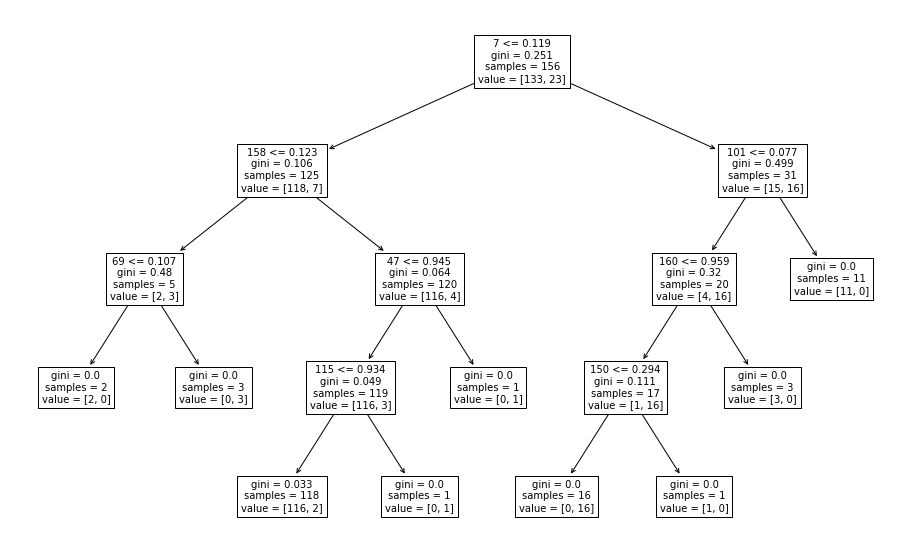

In [ ]:
import matplotlib.pyplot as plt

# 그래프, 도표 크기를 크게 보고 싶을 때
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16, 10

TreeGraph = tree.plot_tree(classifier, feature_names = time, fontsize = 10, max_depth = 4)
plt.show(TreeGraph)

In [ ]:
------------

SyntaxError: ignored

In [ ]:
local_use = list()
local_use.append(Residential)
local_use.append(Commercial)
local_use.append(Apartment)
local_use.append(Shoppingmall)

In [ ]:
average_list = list()
target_average_list = list()
nontarget_average_list = list()

for target in local_use: #0:주거, 1: 상업, 2: 아파트 3:쇼핑몰
    data['SpecificArea'] = data.index.isin(target) #Data의 index 중 target에 속하는 index를 true로 반환.
    average = 0
    target_average = 0
    nontarget_average = 0
    for i in range(100):
        check = False
        sample_num = int(len(data)*0.8)
        while (check == False):
            random_num = random.randrange(1,100000)
            train_data = data.sample(sample_num, replace=False, random_state=random_num) #원래는 random_state=2022 20프로를 train_data로 분류
            test_data = data.loc[ ~data.index.isin(train_data.index)]
            target_num = train_data['SpecificArea'].sum()
            if ((target_num >= int(0.7*len(target))) & (target_num <= int(0.8*len(target)))):
                check = True

        classifier = tree.DecisionTreeClassifier(max_depth = 4)
        classifier.fit(train_data[time], train_data['SpecificArea'])
        test_data['pred'] = classifier.predict(test_data[time])

        Indoor_false = 0
        for j in test_data.index:
            if test_data['SpecificArea'][j] and test_data['pred'][j] == False:
                Indoor_false = Indoor_false + 1
        average += (test_data['pred'] == test_data['SpecificArea']).mean()
        length = len(target)
        target_average += (length-target_num-Indoor_false) / (length - target_num) #target_num = train 데이터에 속한 target 데이터 개수, Indoor_false = 지역 용도 데이터 중 잘못 분류된 데이터 개수
        nonIndoor_false = 0
        for j in test_data.index:
            if (test_data['SpecificArea'][j] == False) and (test_data['pred'][j] == True):
                nonIndoor_false += 1
        nontarget_num = len(test_data) - (length - target_num)
        nontarget_average += (nontarget_num - nonIndoor_false) / nontarget_num


    average_list.append(average / 100)
    target_average_list.append(target_average / 100)
    nontarget_average_list.append(nontarget_average / 100)

In [ ]:
print(len(Residential))
print(len(Commercial))
print(len(Apartment))
print(len(Shoppingmall))
#총 196개

In [ ]:
len(test_data)

In [ ]:
print(average_list)
print(target_average_list)
print(nontarget_average_list)